In [14]:
import pandas as pd
import numpy as np
import os
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder,minmax_scale
from sklearn import model_selection
import matplotlib.pyplot as plt
from __future__ import absolute_import, division, print_function
from tensorflow import keras
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras import regularizers

In [15]:
data_train = pd.read_csv('/Users/wanghanxuan/Desktop/BDT Lecture/5001 Foundation of Data Analytics/Kaggle/train.csv')
data_test = pd.read_csv('/Users/wanghanxuan/Desktop/BDT Lecture/5001 Foundation of Data Analytics/Kaggle/test.csv')

In [16]:
data = pd.concat([data_train,data_test], axis = 0).drop(['id','random_state'], axis = 1)

In [17]:
#data['penalty'] = LabelEncoder().fit_transform(data['penalty'])
data['alpha'] = LabelEncoder().fit_transform(data['alpha'])
def fun(x):
    if x == -1:
        return 8
    else:
        return x
data['n_jobs'] = data['n_jobs'].apply(lambda x: fun(x))

In [18]:
def penalty(x):
    if x == 'none':
        x = 0
    elif x =='l2':
        x = 1
    elif x =='l1':
        x = 2
    elif x =='elasticnet':
        x = 3
    return x

In [19]:
data['penalty'] = data['penalty'].apply(lambda x: penalty(x))

In [20]:
data.index = range(len(data))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
alpha                   500 non-null int64
flip_y                  500 non-null float64
l1_ratio                500 non-null float64
max_iter                500 non-null int64
n_classes               500 non-null int64
n_clusters_per_class    500 non-null int64
n_features              500 non-null int64
n_informative           500 non-null int64
n_jobs                  500 non-null int64
n_samples               500 non-null int64
penalty                 500 non-null int64
scale                   500 non-null float64
time                    400 non-null float64
dtypes: float64(4), int64(9)
memory usage: 50.9 KB


In [21]:
#import numpy array to DataSet
train_x = data.iloc[0:400,0:12]
train_y = data.iloc[0:400,12]

In [22]:
test_x = data.iloc[400:500,0:12]
test_y = data.iloc[400:500,12]

In [23]:
# get training data
# train_x, test_x, train_y, test_y = train_test_split(data1,label,test_size=0.2,random_state=5)

In [24]:
# Test data is *not* used when calculating the mean and std
train_x = minmax_scale(train_x, feature_range=(0, 1), axis=0, copy=True)
test_x = minmax_scale(test_x, feature_range=(0, 1), axis=0, copy=True)
# mean = train_x.mean(axis=0)
# std = train_x.std(axis=0)
# train_x = (train_x - mean) / std
# test_x = (test_x - mean) / std

In [25]:
def build_model():
    model = keras.Sequential()
    model.add(Dense(256, activation='relu', input_dim=12))
    model.add(Dense(256, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dense(256, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dense(1, activation='relu'))

    model.compile(loss='mse',
                    optimizer='adam',
                    metrics=['mae'])
    
    
    
    return model

model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 256)               3328      
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 135,169
Trainable params: 135,169
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Display training progress by printing a single dot for each completed epoch
EPOCHS = 500

# Store training stats
history = model.fit(train_x, train_y, epochs=EPOCHS,
                    
                    validation_split=0.1, verbose=1,
                    
                    batch_size=5)

Train on 360 samples, validate on 40 samples
Epoch 1/500
360/360 [==============================] - 1s 2ms/step - loss: 26.0904 - mean_absolute_error: 2.6841 - val_loss: 12.2926 - val_mean_absolute_error: 2.3161
Epoch 2/500
360/360 [==============================] - 0s 440us/step - loss: 15.0818 - mean_absolute_error: 2.1551 - val_loss: 8.2058 - val_mean_absolute_error: 1.7748
Epoch 3/500
360/360 [==============================] - 0s 422us/step - loss: 13.6573 - mean_absolute_error: 1.8778 - val_loss: 7.8736 - val_mean_absolute_error: 1.9595
Epoch 4/500
360/360 [==============================] - 0s 419us/step - loss: 9.9765 - mean_absolute_error: 1.5015 - val_loss: 6.4269 - val_mean_absolute_error: 1.1406
Epoch 5/500
360/360 [==============================] - 0s 424us/step - loss: 10.5349 - mean_absolute_error: 1.5882 - val_loss: 13.1999 - val_mean_absolute_error: 1.9053
Epoch 6/500
360/360 [==============================] - 0s 407us/step - loss: 9.8962 - mean_absolute_error: 1.4516 - 

360/360 [==============================] - 0s 430us/step - loss: 2.1480 - mean_absolute_error: 0.6489 - val_loss: 2.2029 - val_mean_absolute_error: 0.6932
Epoch 50/500
360/360 [==============================] - 0s 431us/step - loss: 1.7513 - mean_absolute_error: 0.5790 - val_loss: 2.5865 - val_mean_absolute_error: 0.7691
Epoch 51/500
360/360 [==============================] - 0s 477us/step - loss: 2.3625 - mean_absolute_error: 0.6820 - val_loss: 6.3473 - val_mean_absolute_error: 1.3701
Epoch 52/500
360/360 [==============================] - 0s 458us/step - loss: 2.2529 - mean_absolute_error: 0.6661 - val_loss: 3.3101 - val_mean_absolute_error: 0.8745
Epoch 53/500
360/360 [==============================] - 0s 419us/step - loss: 2.0283 - mean_absolute_error: 0.6500 - val_loss: 3.8288 - val_mean_absolute_error: 0.9555
Epoch 54/500
360/360 [==============================] - 0s 429us/step - loss: 1.5905 - mean_absolute_error: 0.5413 - val_loss: 2.4182 - val_mean_absolute_error: 0.7835
Epoch

Epoch 98/500
360/360 [==============================] - 0s 468us/step - loss: 0.9743 - mean_absolute_error: 0.4243 - val_loss: 1.7420 - val_mean_absolute_error: 0.6693
Epoch 99/500
360/360 [==============================] - 0s 418us/step - loss: 0.8748 - mean_absolute_error: 0.3839 - val_loss: 1.6190 - val_mean_absolute_error: 0.6357
Epoch 100/500
360/360 [==============================] - 0s 450us/step - loss: 0.8719 - mean_absolute_error: 0.3657 - val_loss: 1.8950 - val_mean_absolute_error: 0.7066
Epoch 101/500
360/360 [==============================] - 0s 420us/step - loss: 1.0212 - mean_absolute_error: 0.4385 - val_loss: 1.4181 - val_mean_absolute_error: 0.6367
Epoch 102/500
360/360 [==============================] - 0s 436us/step - loss: 1.0475 - mean_absolute_error: 0.4240 - val_loss: 1.9388 - val_mean_absolute_error: 0.7272
Epoch 103/500
360/360 [==============================] - 0s 643us/step - loss: 1.8331 - mean_absolute_error: 0.6386 - val_loss: 2.1432 - val_mean_absolute_er

360/360 [==============================] - 0s 413us/step - loss: 0.6323 - mean_absolute_error: 0.2992 - val_loss: 1.3322 - val_mean_absolute_error: 0.6364
Epoch 147/500
360/360 [==============================] - 0s 442us/step - loss: 0.5364 - mean_absolute_error: 0.2408 - val_loss: 1.2844 - val_mean_absolute_error: 0.6505
Epoch 148/500
360/360 [==============================] - 0s 478us/step - loss: 0.4945 - mean_absolute_error: 0.2218 - val_loss: 1.3621 - val_mean_absolute_error: 0.6641
Epoch 149/500
360/360 [==============================] - 0s 557us/step - loss: 0.5181 - mean_absolute_error: 0.2449 - val_loss: 1.4725 - val_mean_absolute_error: 0.6115
Epoch 150/500
360/360 [==============================] - 0s 470us/step - loss: 0.6095 - mean_absolute_error: 0.3006 - val_loss: 1.2744 - val_mean_absolute_error: 0.6229
Epoch 151/500
360/360 [==============================] - 0s 464us/step - loss: 0.5681 - mean_absolute_error: 0.2820 - val_loss: 1.3218 - val_mean_absolute_error: 0.6415


360/360 [==============================] - 0s 578us/step - loss: 0.4152 - mean_absolute_error: 0.2342 - val_loss: 1.1418 - val_mean_absolute_error: 0.6123
Epoch 195/500
360/360 [==============================] - 0s 404us/step - loss: 0.4597 - mean_absolute_error: 0.2623 - val_loss: 1.8285 - val_mean_absolute_error: 0.7314
Epoch 196/500
360/360 [==============================] - 0s 405us/step - loss: 0.7773 - mean_absolute_error: 0.4110 - val_loss: 1.2409 - val_mean_absolute_error: 0.6506
Epoch 197/500
360/360 [==============================] - 0s 406us/step - loss: 0.8901 - mean_absolute_error: 0.3836 - val_loss: 3.0503 - val_mean_absolute_error: 0.9194
Epoch 198/500
360/360 [==============================] - 0s 470us/step - loss: 0.8841 - mean_absolute_error: 0.3714 - val_loss: 0.9764 - val_mean_absolute_error: 0.5635
Epoch 199/500
360/360 [==============================] - 0s 420us/step - loss: 0.6933 - mean_absolute_error: 0.3473 - val_loss: 1.0336 - val_mean_absolute_error: 0.5909


360/360 [==============================] - 0s 475us/step - loss: 0.3968 - mean_absolute_error: 0.2532 - val_loss: 1.0583 - val_mean_absolute_error: 0.6111
Epoch 243/500
360/360 [==============================] - 0s 413us/step - loss: 0.3474 - mean_absolute_error: 0.2098 - val_loss: 1.0312 - val_mean_absolute_error: 0.6161
Epoch 244/500
360/360 [==============================] - 0s 417us/step - loss: 0.3917 - mean_absolute_error: 0.2491 - val_loss: 1.2225 - val_mean_absolute_error: 0.6664
Epoch 245/500
360/360 [==============================] - 0s 420us/step - loss: 0.5353 - mean_absolute_error: 0.2977 - val_loss: 1.5839 - val_mean_absolute_error: 0.6569
Epoch 246/500
360/360 [==============================] - 0s 444us/step - loss: 1.2074 - mean_absolute_error: 0.5023 - val_loss: 0.7895 - val_mean_absolute_error: 0.5237
Epoch 247/500
360/360 [==============================] - 0s 417us/step - loss: 1.8228 - mean_absolute_error: 0.7063 - val_loss: 2.0455 - val_mean_absolute_error: 0.8308


360/360 [==============================] - 0s 415us/step - loss: 0.3320 - mean_absolute_error: 0.2157 - val_loss: 0.7557 - val_mean_absolute_error: 0.5044
Epoch 291/500
360/360 [==============================] - 0s 396us/step - loss: 0.3653 - mean_absolute_error: 0.2565 - val_loss: 0.9287 - val_mean_absolute_error: 0.5673
Epoch 292/500
360/360 [==============================] - 0s 417us/step - loss: 0.5004 - mean_absolute_error: 0.3090 - val_loss: 0.8650 - val_mean_absolute_error: 0.4927
Epoch 293/500
360/360 [==============================] - 0s 397us/step - loss: 0.4540 - mean_absolute_error: 0.2764 - val_loss: 0.7998 - val_mean_absolute_error: 0.5013
Epoch 294/500
360/360 [==============================] - 0s 340us/step - loss: 0.4516 - mean_absolute_error: 0.3126 - val_loss: 0.8428 - val_mean_absolute_error: 0.5476
Epoch 295/500
360/360 [==============================] - 0s 349us/step - loss: 0.4031 - mean_absolute_error: 0.2591 - val_loss: 0.7044 - val_mean_absolute_error: 0.5184


360/360 [==============================] - 0s 434us/step - loss: 0.2445 - mean_absolute_error: 0.1820 - val_loss: 0.6457 - val_mean_absolute_error: 0.4740
Epoch 339/500
360/360 [==============================] - 0s 433us/step - loss: 0.2970 - mean_absolute_error: 0.1967 - val_loss: 0.9188 - val_mean_absolute_error: 0.5201
Epoch 340/500
360/360 [==============================] - 0s 433us/step - loss: 0.3217 - mean_absolute_error: 0.2407 - val_loss: 0.5926 - val_mean_absolute_error: 0.4711
Epoch 341/500
360/360 [==============================] - 0s 420us/step - loss: 0.2817 - mean_absolute_error: 0.2145 - val_loss: 0.8508 - val_mean_absolute_error: 0.4945
Epoch 342/500
360/360 [==============================] - 0s 391us/step - loss: 0.3294 - mean_absolute_error: 0.2578 - val_loss: 1.0641 - val_mean_absolute_error: 0.5923
Epoch 343/500
360/360 [==============================] - 0s 347us/step - loss: 0.3845 - mean_absolute_error: 0.2765 - val_loss: 0.7998 - val_mean_absolute_error: 0.4744


360/360 [==============================] - 0s 402us/step - loss: 0.1933 - mean_absolute_error: 0.1376 - val_loss: 0.6184 - val_mean_absolute_error: 0.4666
Epoch 387/500
360/360 [==============================] - 0s 425us/step - loss: 0.2016 - mean_absolute_error: 0.1304 - val_loss: 1.0838 - val_mean_absolute_error: 0.5078
Epoch 388/500
360/360 [==============================] - 0s 418us/step - loss: 0.2935 - mean_absolute_error: 0.2266 - val_loss: 0.5589 - val_mean_absolute_error: 0.4624
Epoch 389/500
360/360 [==============================] - 0s 420us/step - loss: 0.3344 - mean_absolute_error: 0.2384 - val_loss: 0.7058 - val_mean_absolute_error: 0.5033
Epoch 390/500
360/360 [==============================] - 0s 427us/step - loss: 0.3284 - mean_absolute_error: 0.2448 - val_loss: 0.8834 - val_mean_absolute_error: 0.5208
Epoch 391/500
360/360 [==============================] - 0s 440us/step - loss: 0.3284 - mean_absolute_error: 0.2507 - val_loss: 0.5334 - val_mean_absolute_error: 0.4068


360/360 [==============================] - 0s 410us/step - loss: 0.6226 - mean_absolute_error: 0.4134 - val_loss: 1.2603 - val_mean_absolute_error: 0.5777
Epoch 435/500
360/360 [==============================] - 0s 431us/step - loss: 0.6791 - mean_absolute_error: 0.4291 - val_loss: 0.9804 - val_mean_absolute_error: 0.5627
Epoch 436/500
360/360 [==============================] - 0s 425us/step - loss: 0.4787 - mean_absolute_error: 0.3358 - val_loss: 1.0156 - val_mean_absolute_error: 0.5483
Epoch 437/500
360/360 [==============================] - 0s 426us/step - loss: 0.2641 - mean_absolute_error: 0.2097 - val_loss: 0.6403 - val_mean_absolute_error: 0.4694
Epoch 438/500
360/360 [==============================] - 0s 469us/step - loss: 0.2422 - mean_absolute_error: 0.1882 - val_loss: 0.5985 - val_mean_absolute_error: 0.4480
Epoch 439/500
360/360 [==============================] - 0s 535us/step - loss: 0.2108 - mean_absolute_error: 0.1681 - val_loss: 0.5967 - val_mean_absolute_error: 0.4777


360/360 [==============================] - 0s 437us/step - loss: 0.3050 - mean_absolute_error: 0.2618 - val_loss: 0.6264 - val_mean_absolute_error: 0.4577
Epoch 483/500
360/360 [==============================] - 0s 427us/step - loss: 0.2566 - mean_absolute_error: 0.2154 - val_loss: 0.6512 - val_mean_absolute_error: 0.4655
Epoch 484/500
360/360 [==============================] - 0s 410us/step - loss: 0.1700 - mean_absolute_error: 0.1286 - val_loss: 0.5951 - val_mean_absolute_error: 0.4325
Epoch 485/500
360/360 [==============================] - 0s 499us/step - loss: 0.1657 - mean_absolute_error: 0.1240 - val_loss: 0.5468 - val_mean_absolute_error: 0.4444
Epoch 486/500
360/360 [==============================] - 0s 432us/step - loss: 0.1502 - mean_absolute_error: 0.0988 - val_loss: 0.5260 - val_mean_absolute_error: 0.4394
Epoch 487/500
360/360 [==============================] - 0s 422us/step - loss: 0.1604 - mean_absolute_error: 0.1185 - val_loss: 0.5732 - val_mean_absolute_error: 0.4586


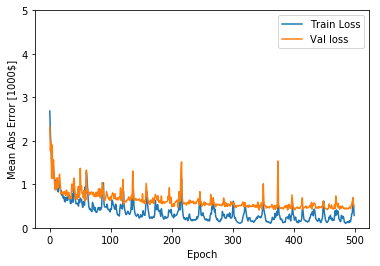

In [27]:
import matplotlib.pyplot as plt


def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [1000$]')
    plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),
           label='Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
           label = 'Val loss')
    plt.legend()
    plt.ylim([0, 5])
  
plot_history(history)

In [28]:
[loss, mae] = model.evaluate(train_x, train_y, verbose=0)

print("Testing set Mean Abs Error: ${:7.2f}".format(mae * 1000))

Testing set Mean Abs Error: $ 268.88


In [29]:
test_predictions = model.predict(test_x)

In [30]:
y_predict = pd.DataFrame(test_predictions)

a = list(range(100))
ID = pd.DataFrame(a)

pre = pd.concat([ID, y_predict], axis = 1)

pre.columns = ['Id','time']

pre.to_csv('5001_kaggle_prediction.csv',index = None)